<a href="https://colab.research.google.com/github/MitPitt/coursework/blob/main/Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модель Басса

просто для красоты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dfsn_abm(p, q, M, T):
    adopt = list()
    x = np.zeros((M,), np.float32)
    x_temp = np.zeros((M,), np.float32)
    adoptions = pd.DataFrame(np.arange(1,T), columns = ['time'])
    for t in range(T):
        for i in range(1,M):
            prob = (p + q * (np.sum(x) / M)) * (1 - x[i])
            if np.random.uniform(0,1,1) <= prob:
                x_temp[i] = 1
        x = x_temp
        adopt.append(np.sum(x))
    return adopt

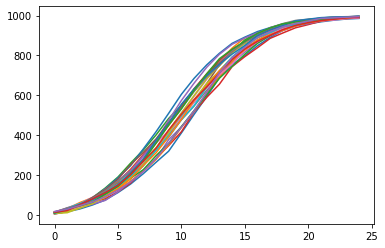

In [ ]:
sim_dfsn = [dfsn_abm(0.01, 0.3, 1000, 25) for _ in range(25)]
df = pd.DataFrame(np.array(sim_dfsn))
df = df.transpose()

df.plot(legend = None)

## Предложенная модель

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Пример построения графа библиотекой NetworkX

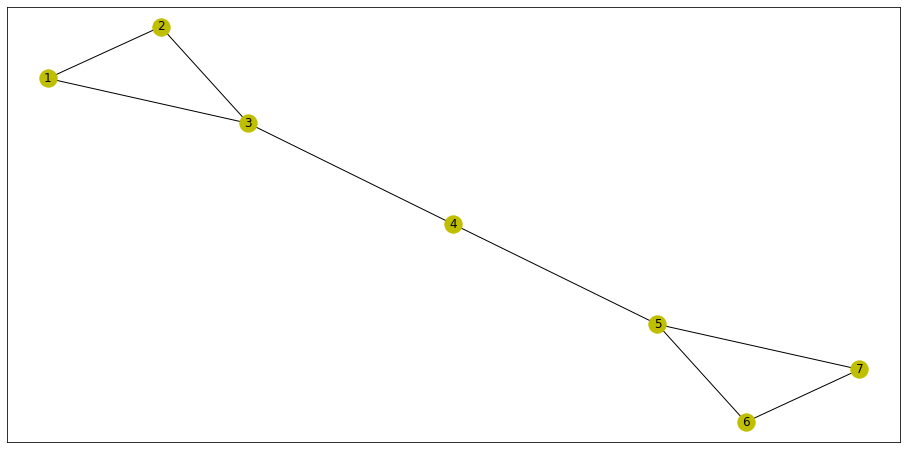

In [2]:
social_network = nx.Graph()
social_network.add_edges_from([(1,2), (1,3), (3,4), (4,5), (5,6), (5,7), (6,7), (2,3)])

pos = nx.spring_layout(social_network)

plt.figure(figsize=(16,8))
nx.draw_networkx(social_network, pos, node_color='y')
plt.show()

Построение графа из набора данных "Social circles: Facebook"

https://snap.stanford.edu/data/egonets-Facebook.html

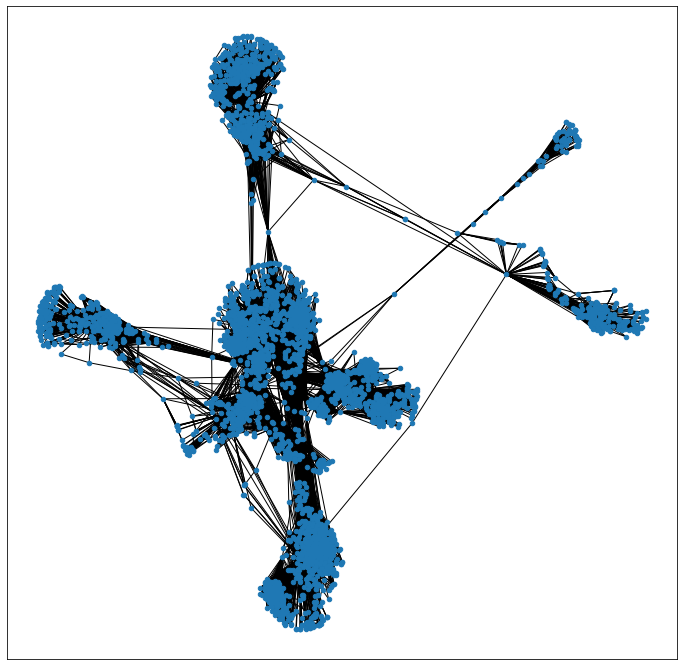

In [3]:
social_network = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

pos = nx.spring_layout(social_network)

plt.figure(figsize=(12,12))
nx.draw_networkx(social_network, pos, with_labels=False, node_size=20)
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def step(social_network, seeds, x, leng):
    new_seeds = set()

    if leng == 0:
        for node in social_network.nodes:
            if node in seeds:
                continue
            else:
                #for neighbor in social_network.predecessors(node): # для направленного графа
                for neighbor in social_network.neighbors(node):
                    if neighbor in seeds:
                        p = sigmoid(social_network.nodes[node]['b'])
                        if random.random() > 1-p:
                            new_seeds.add(node) 
                            break
    else:
        for node in social_network.nodes:
            if node in seeds:
                continue
            else:
                #for neighbor in social_network.predecessors(node): # для направленного графа
                for neighbor in social_network.neighbors(node):
                    if neighbor in seeds:
                        p = sigmoid(social_network.nodes[node]['b'] + x.dot(social_network.edges[neighbor,node]['w']))
                        if random.random() > 1-p:
                            new_seeds.add(node) 
                            break

    seeds |= new_seeds

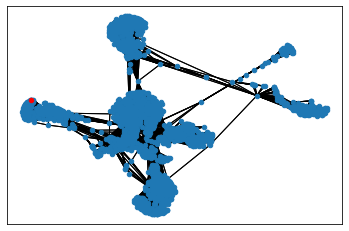

In [5]:
seeds = set(random.sample(social_network.nodes, 1))

nx.draw_networkx(social_network, pos, with_labels=False, node_size=20)
nx.draw_networkx(social_network, pos, nodelist = seeds, node_color = 'r', with_labels=False, node_size=20)

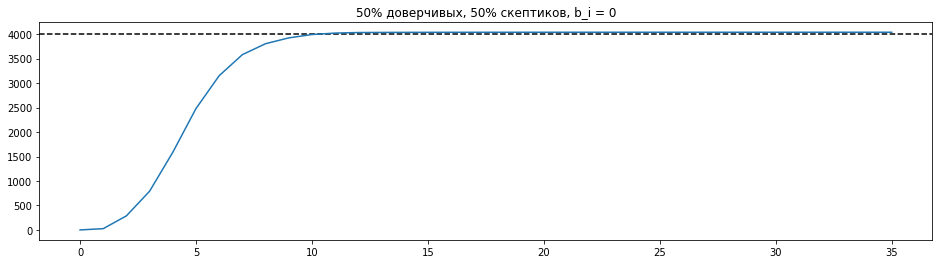

In [ ]:
alls = []
maxx = 0

x = np.array([0.5]) # параметры сообщения
leng = len(x)

ratio = 0.50

for _ in range(100):
        
    for edge in social_network.edges:
        if random.random() >= ratio:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([-2])
        else:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([2])

    for node in social_network.nodes:
        social_network.nodes[node]['b'] = 0#np.random.normal()
        # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

    seeds = set(random.sample(social_network.nodes, 1))

    cont = [len(seeds)]
    while len(seeds) < len(social_network.nodes):
        step(social_network, seeds, x, leng)
        cont.append(len(seeds))
    if len(cont) > maxx:
        maxx = len(cont)
    alls.append(cont)

for i in range(len(alls)):
    if len(alls[i]) < maxx:
        alls[i].extend([len(social_network.nodes)]*(maxx-len(alls[i])))
alls = np.mean(alls, axis=0)

plt.figure(figsize=(16,4))
plt.axhline(y=int(4039*0.99), color='black', linestyle='--')
plt.title('50% доверчивых, 50% скептиков, b_i = 0') #∈ N(0,1)
plt.plot(alls)
plt.show()

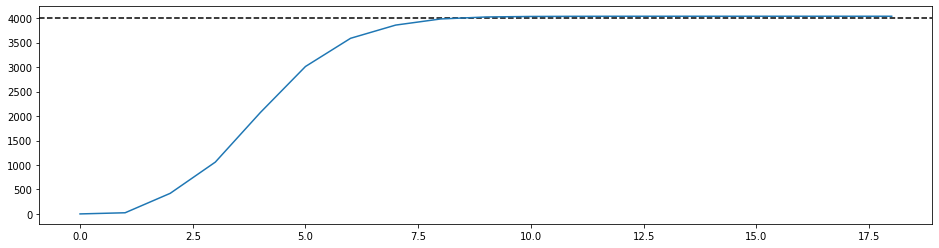

In [7]:
alls = []
maxx = 0

x = np.array([0.5,0.5]) # параметры сообщения
leng = len(x)

ratio = 0.50

for _ in range(100):
        
    for edge in social_network.edges:
        if 0.66 <= random.random():
            social_network.edges[edge[0],edge[1]]['w'] = np.array([-2,0])
        if 0.33 <= random.random() < 0.66:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([2,2])
        else:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([2,-2])

    for node in social_network.nodes:
        social_network.nodes[node]['b'] = 0#np.random.normal()
        # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

    seeds = set(random.sample(social_network.nodes, 1))

    cont = [len(seeds)]
    while len(seeds) < len(social_network.nodes):
        step(social_network, seeds, x, leng)
        cont.append(len(seeds))
    if len(cont) > maxx:
        maxx = len(cont)
    alls.append(cont)

for i in range(len(alls)):
    if len(alls[i]) < maxx:
        alls[i].extend([len(social_network.nodes)]*(maxx-len(alls[i])))
alls = np.mean(alls, axis=0)

plt.figure(figsize=(16,4))
plt.axhline(y=int(4039*0.99), color='black', linestyle='--')
plt.plot(alls)
plt.show()

In [18]:
matrix = np.zeros((5,5))
print(matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [50]:
iters = 11

matrix = np.zeros((iters,iters))

for i, x1 in enumerate(np.linspace(-1,1,iters)):
    for j, x2 in enumerate(np.linspace(-1,1,iters)):
        alls = []

        x = np.array([x1,x2]) # параметры сообщения
        leng = len(x)

        ratio = 0.50

        for _ in range(25):
                
            for edge in social_network.edges:
                if 0.66 <= random.random():
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([-2,0])
                if 0.33 <= random.random() < 0.66:
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([2,2])
                else:
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([2,-2])

            for node in social_network.nodes:
                social_network.nodes[node]['b'] = 0#np.random.normal()
                # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

            seeds = set(random.sample(social_network.nodes, 1))

            cont = [len(seeds)]
            while len(seeds) < int(4039*0.99):
                step(social_network, seeds, x, leng)
                cont.append(len(seeds))
            alls.append(len(cont))

        matrix[i,j] = np.mean(alls)
        #print(i,j)
        print(x1,x2, np.mean(alls))

-1.0 -1.0 15.16
-1.0 -0.8 15.0
-1.0 -0.6 16.72
-1.0 -0.3999999999999999 18.08
-1.0 -0.19999999999999996 20.24
-1.0 0.0 22.24
-1.0 0.20000000000000018 24.28
-1.0 0.40000000000000013 26.12
-1.0 0.6000000000000001 30.16
-1.0 0.8 39.76
-1.0 1.0 50.68
-0.8 -1.0 12.84
-0.8 -0.8 12.6
-0.8 -0.6 14.28
-0.8 -0.3999999999999999 16.04
-0.8 -0.19999999999999996 16.44
-0.8 0.0 17.52
-0.8 0.20000000000000018 18.44
-0.8 0.40000000000000013 19.84
-0.8 0.6000000000000001 24.68
-0.8 0.8 29.2
-0.8 1.0 37.48
-0.6 -1.0 11.84
-0.6 -0.8 11.84
-0.6 -0.6 12.4
-0.6 -0.3999999999999999 13.08
-0.6 -0.19999999999999996 12.92
-0.6 0.0 13.8
-0.6 0.20000000000000018 14.84
-0.6 0.40000000000000013 16.52
-0.6 0.6000000000000001 18.28
-0.6 0.8 21.16
-0.6 1.0 26.8
-0.3999999999999999 -1.0 10.4
-0.3999999999999999 -0.8 10.64
-0.3999999999999999 -0.6 10.48
-0.3999999999999999 -0.3999999999999999 11.32
-0.3999999999999999 -0.19999999999999996 11.72
-0.3999999999999999 0.0 11.92
-0.3999999999999999 0.20000000000000018 13.32
-

In [51]:
print(matrix)

[[15.16 15.   16.72 18.08 20.24 22.24 24.28 26.12 30.16 39.76 50.68]
 [12.84 12.6  14.28 16.04 16.44 17.52 18.44 19.84 24.68 29.2  37.48]
 [11.84 11.84 12.4  13.08 12.92 13.8  14.84 16.52 18.28 21.16 26.8 ]
 [10.4  10.64 10.48 11.32 11.72 11.92 13.32 12.92 14.96 16.88 22.72]
 [ 9.84  9.92 10.12 10.   10.48 10.92 11.08 11.92 12.68 13.44 16.44]
 [ 9.76  9.44  9.28  9.68 10.   10.    9.96 10.72 11.4  12.36 12.92]
 [ 8.48  8.36  8.36  8.92  8.64  9.04  9.16  9.8  10.32 11.04 11.88]
 [ 8.52  8.16  8.24  8.08  8.08  8.72  8.64  9.12  9.6   9.72 10.84]
 [ 8.4   8.12  8.12  8.2   8.48  7.96  8.16  9.04  9.12  9.08  9.8 ]
 [ 8.2   8.04  8.12  7.8   7.92  7.96  8.08  7.88  8.32  8.36  9.52]
 [ 7.96  7.88  7.56  7.6   7.8   7.68  7.72  7.88  8.24  8.36  8.56]]


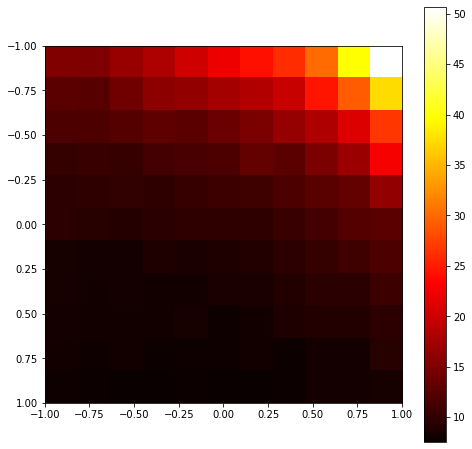

In [53]:
def heatmap2d(arr):
    plt.figure(figsize=(8,8))
    plt.imshow(arr, cmap='hot', extent=[-1,1,1,-1])
    plt.colorbar()
    plt.show()

heatmap2d(matrix)